In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("user_profiles_for_ads.csv")
print(df.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

In [2]:
# Check whether the data has any missing values or not
print(df.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


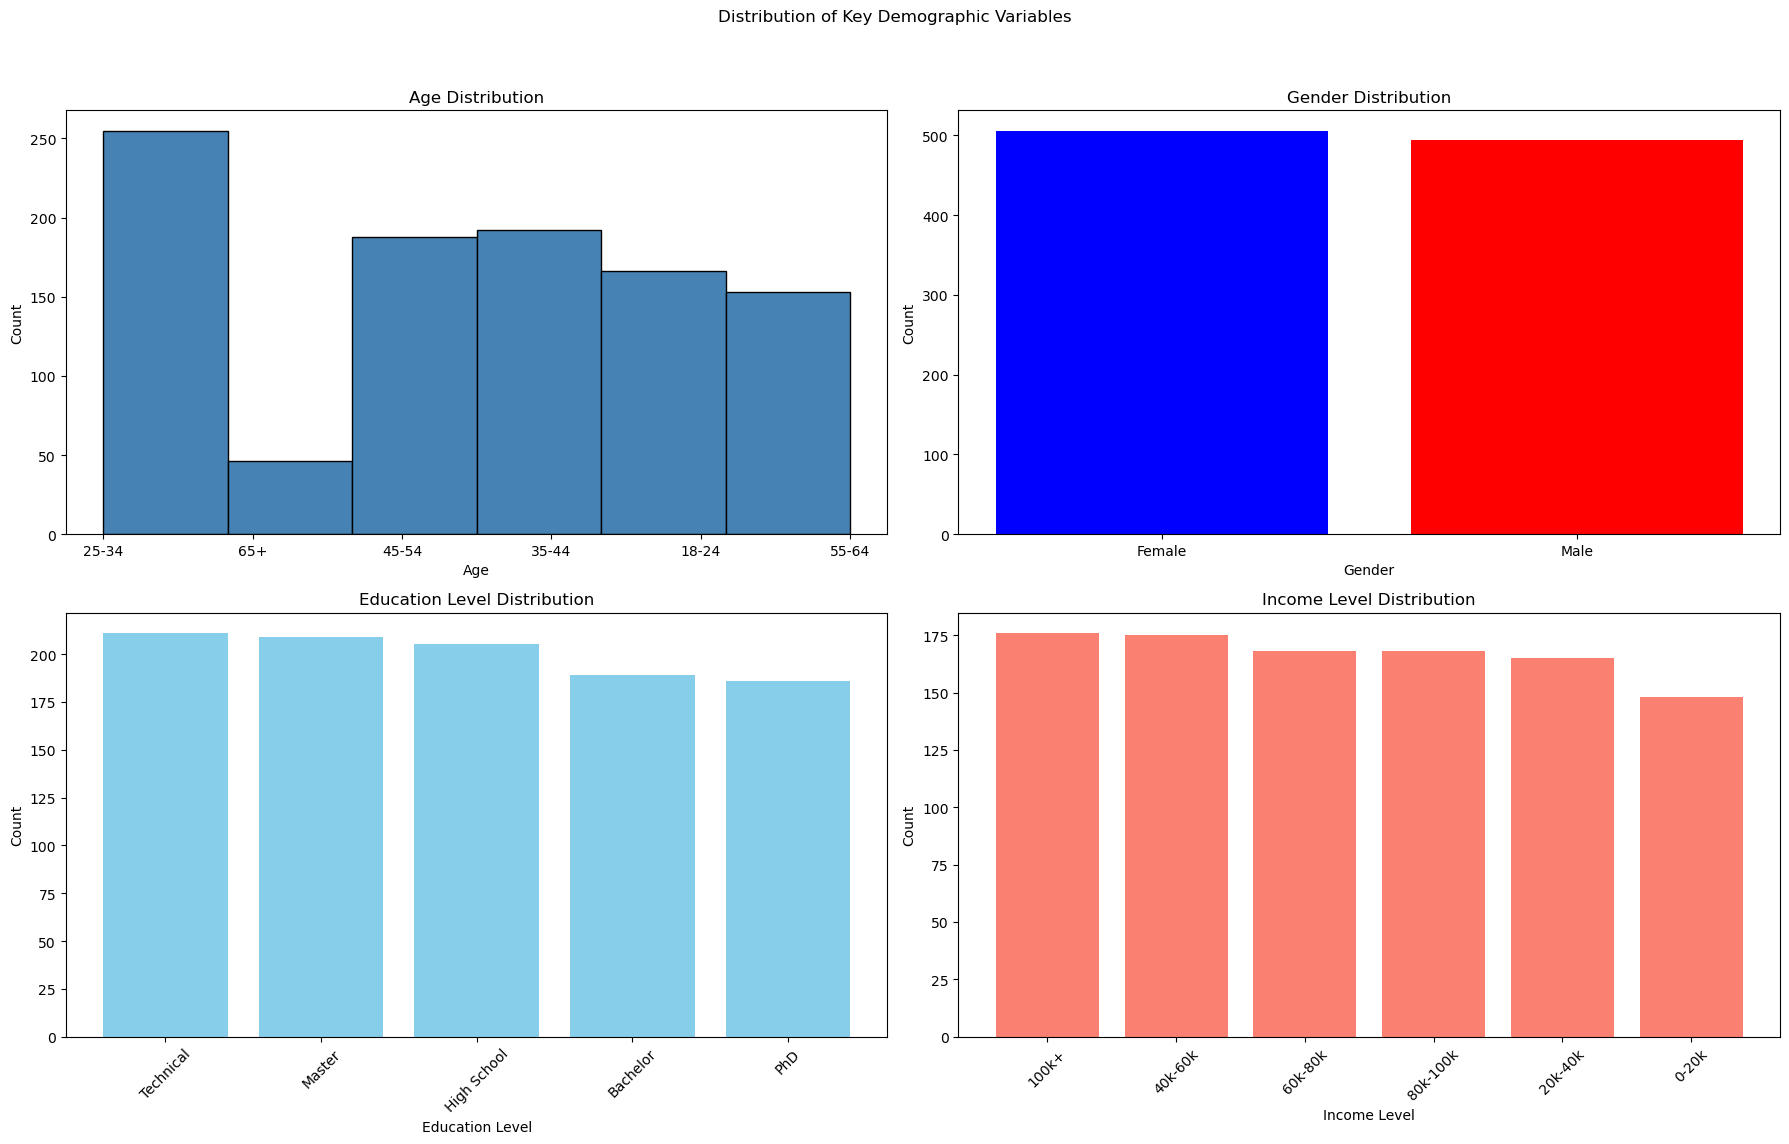

In [8]:
# Visualizing distributions
import matplotlib.pyplot as plt

# Creating subplots for demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# Age Distribution
axes[0, 0].hist(df['Age'], bins=len(df['Age'].unique()), color='steelblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=['blue', 'red', 'purple'])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Education Level Distribution
education_counts = df['Education Level'].value_counts()
axes[1, 0].bar(education_counts.index, education_counts.values, color='skyblue')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Income Level Distribution
income_counts = df['Income Level'].value_counts()
axes[1, 1].bar(income_counts.index, income_counts.values, color='salmon')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


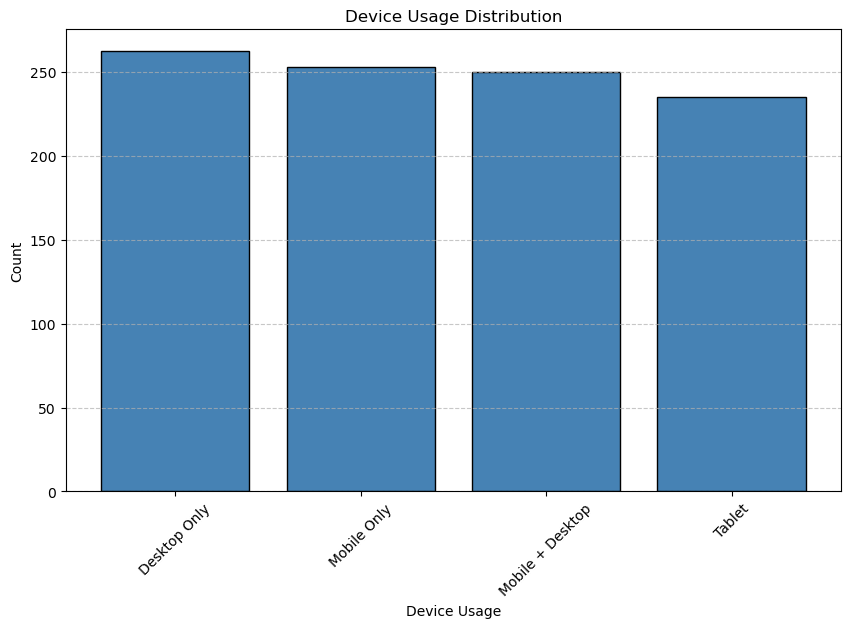

In [9]:
# Device usage distribution using Matplotlib
plt.figure(figsize=(10, 6))
device_counts = df["Device Usage"].value_counts()

plt.bar(device_counts.index, device_counts.values, color="steelblue", edgecolor="black")
plt.xlabel("Device Usage")
plt.ylabel("Count")
plt.title("Device Usage Distribution")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


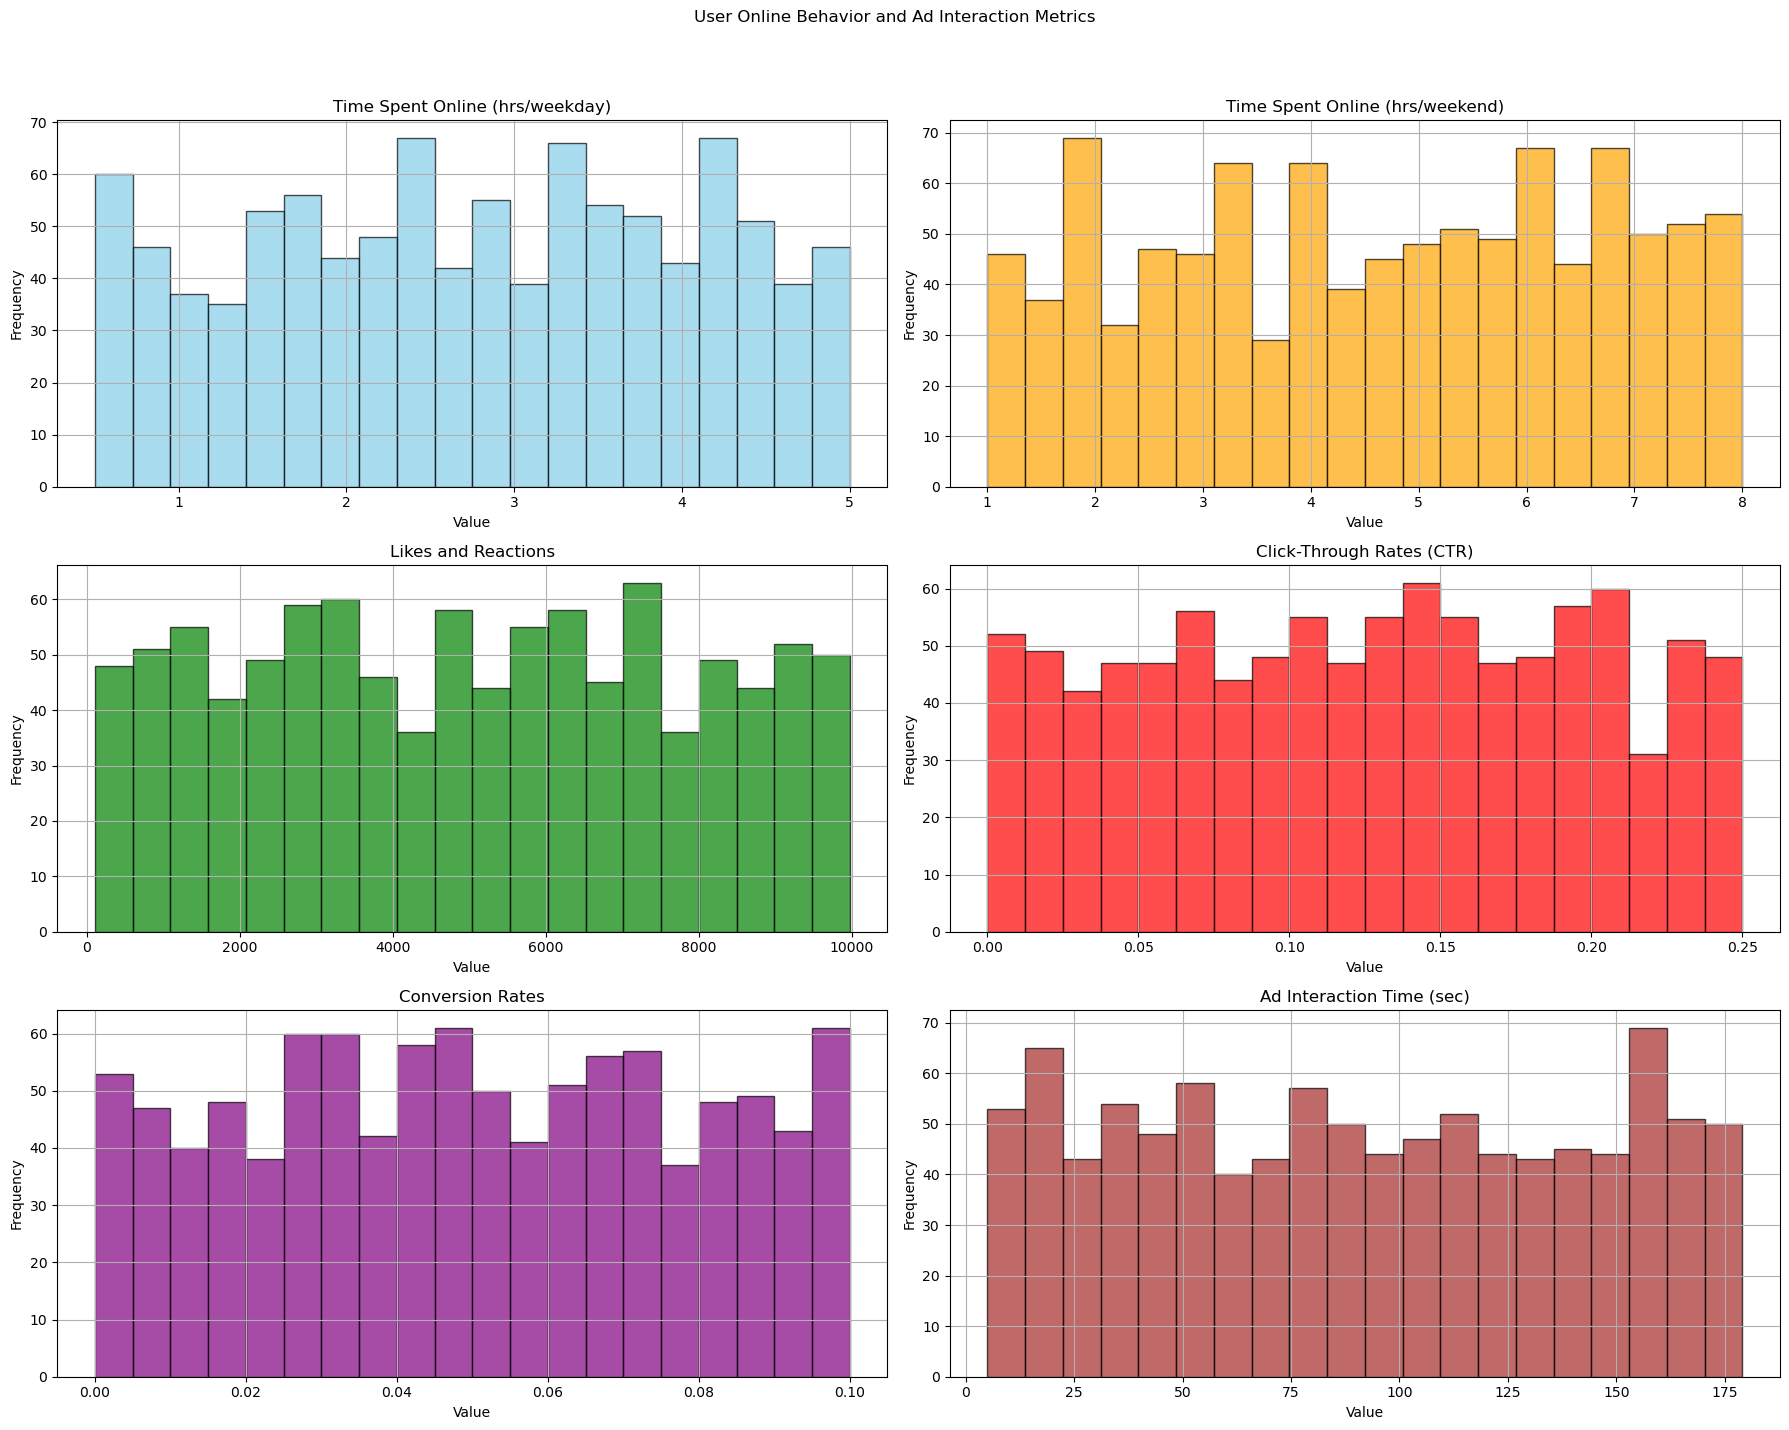

In [10]:
# Creating subplots for user online behavior and ad interaction metrics using Matplotlib
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Defining metrics and colors
metrics = [
    ("Time Spent Online (hrs/weekday)", "skyblue"),
    ("Time Spent Online (hrs/weekend)", "orange"),
    ("Likes and Reactions", "green"),
    ("Click-Through Rates (CTR)", "red"),
    ("Conversion Rates", "purple"),
    ("Ad Interaction Time (sec)", "brown")
]

# Loop through subplots and create histograms
for ax, (metric, color) in zip(axes.flat, metrics):
    ax.hist(df[metric].dropna(), bins=20, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(metric)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


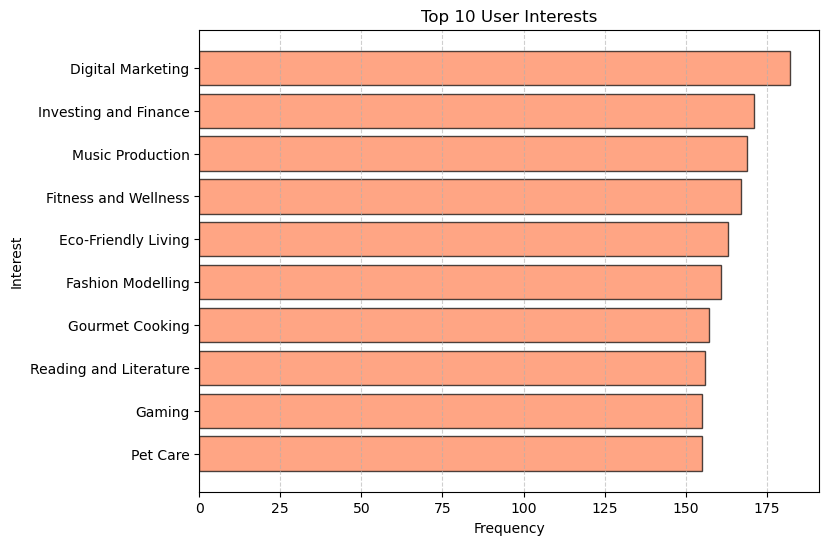

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Splitting the 'Top Interests' column and creating a list of all interests
interests_list = df['Top Interests'].dropna().str.split(', ').sum()

# Counting the frequency of each interest
interests_counter = Counter(interests_list)

# Converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency'])
interests_df = interests_df.sort_values(by='Frequency', ascending=False)

# Selecting the top 10 interests
top_interests = interests_df.head(10)

# Plotting the most common interests using Matplotlib
plt.figure(figsize=(8, 6))
plt.barh(top_interests['Interest'], top_interests['Frequency'], color='coral', edgecolor='black', alpha=0.7)

# Customizing the plot
plt.xlabel("Frequency")
plt.ylabel("Interest")
plt.title("Top 10 User Interests")
plt.gca().invert_yaxis()  # Inverts y-axis for better readability (most frequent on top)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Displaying the plot
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = df[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42, n_init=10))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
df['Cluster'] = cluster_labels

print(df.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

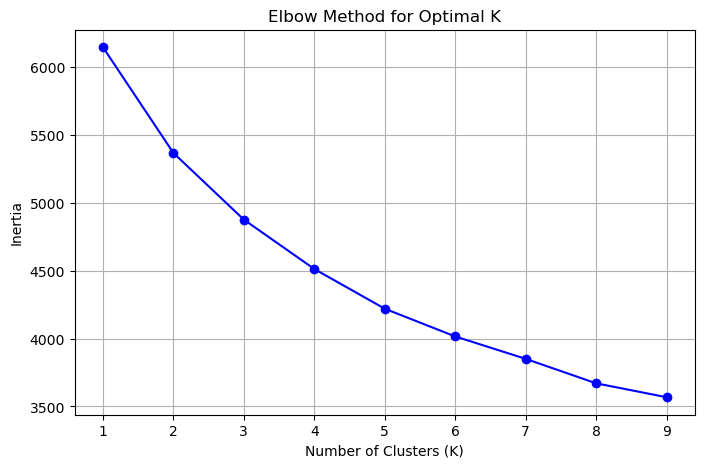

In [15]:
# Elbow Method to determine optimal K
from sklearn.cluster import KMeans
inertia_values = []
k_values = range(1, 10)

df_scaled = pipeline.named_steps['preprocessor'].transform(df_segment)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [16]:
# Choosing optimal K=5 based on the Elbow Method
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_segment["Cluster"] = kmeans_optimal.fit_predict(df_scaled)

# Cluster distribution
print("\nCluster Distribution:")
print(df_segment["Cluster"].value_counts())




Cluster Distribution:
Cluster
2    228
0    216
3    204
4    187
1    165
Name: count, dtype: int64


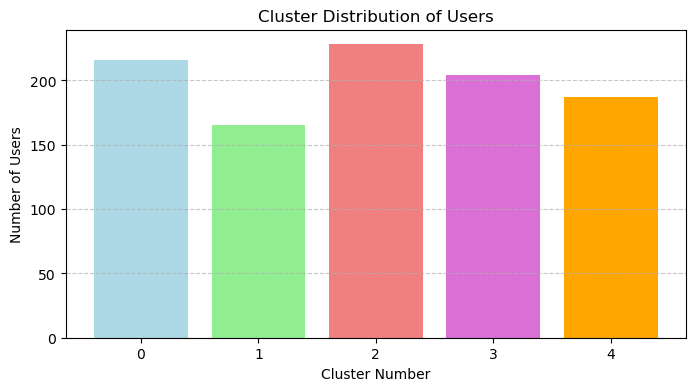

In [23]:
import matplotlib.pyplot as plt

# Cluster distribution count
cluster_counts = df_segment["Cluster"].value_counts().sort_index()

# Bar chart for cluster distribution
plt.figure(figsize=(8, 4))
plt.bar(cluster_counts.index, cluster_counts.values, color=['lightblue', 'lightgreen', 'lightcoral', 'orchid', 'orange'])
plt.xlabel("Cluster Number")
plt.ylabel("Number of Users")
plt.title("Cluster Distribution of Users")
plt.xticks(cluster_counts.index)  # Ensuring cluster labels are correctly shown
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


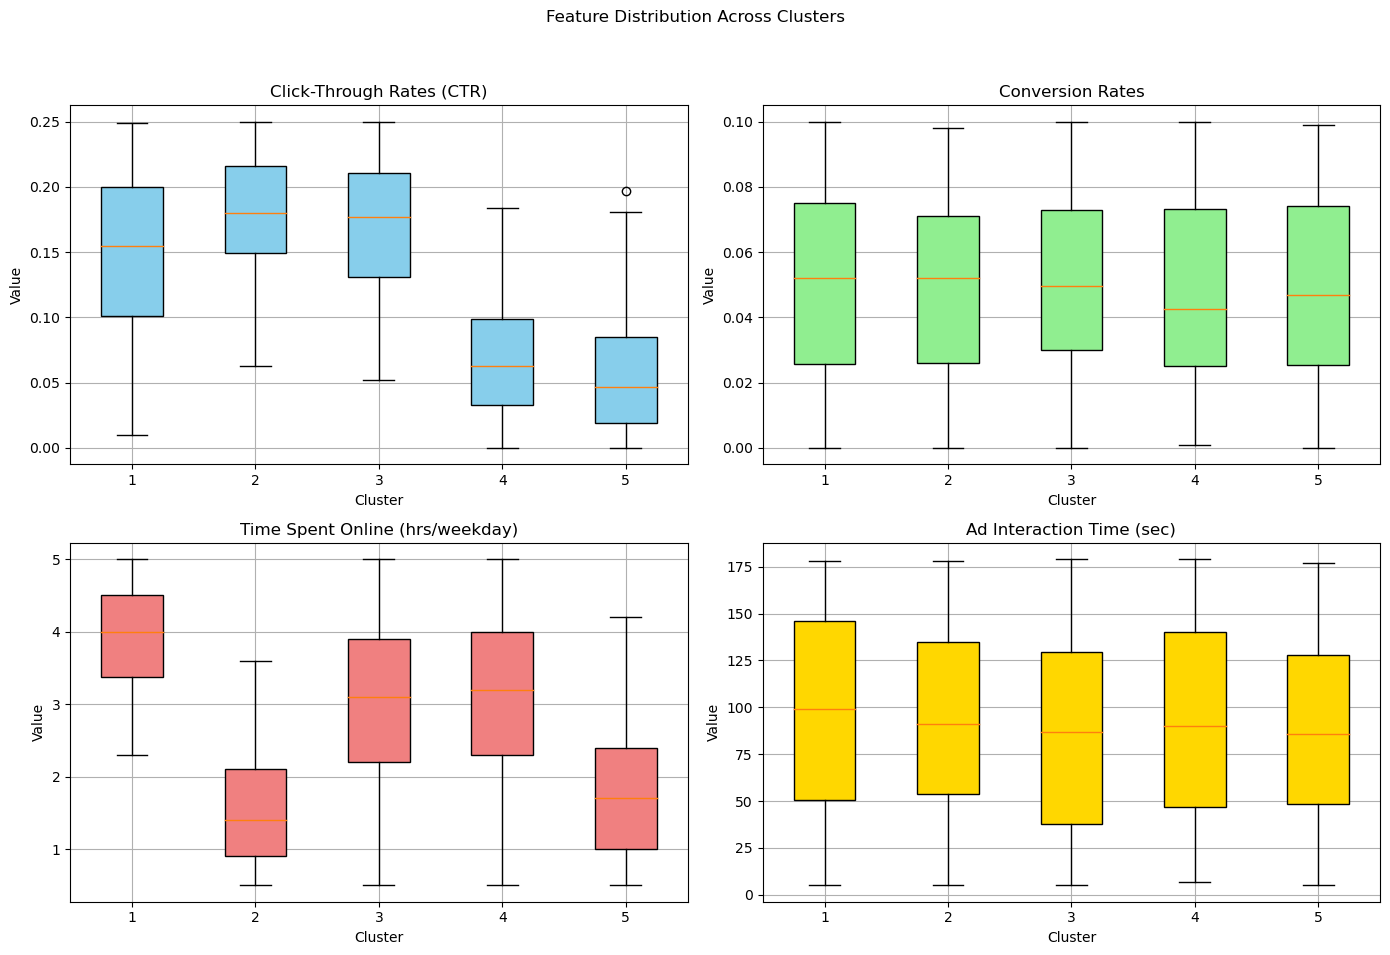

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Feature Distribution Across Clusters")

features_to_plot = ["Click-Through Rates (CTR)", "Conversion Rates", "Time Spent Online (hrs/weekday)", "Ad Interaction Time (sec)"]
colors = ["skyblue", "lightgreen", "lightcoral", "gold"]

for ax, feature, color in zip(axes.flat, features_to_plot, colors):
    ax.boxplot([df_segment[df_segment["Cluster"] == i][feature].dropna() for i in range(optimal_k)], 
               patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_title(feature)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Value")
    ax.set_xticks(range(1, optimal_k + 1))
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [20]:
# computing the mean values of numerical features for each cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.911111                         5.212963   
1                               1.559394                         6.002424   
2                               3.019737                         2.584211   
3                               3.080882                         5.774510   
4                               1.809626                         3.839572   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                2409.620370                   0.149588  25-34  Female   
1                5005.121212                   0.179836  35-44    Male   
2                6861.587719                   0.170614  25-34    Male   
3                7457.602941                   0.067971  25-34  Female   
4               